<a href="https://colab.research.google.com/github/BeautyKabore/Projects/blob/main/Machine_Learning/Apply_AI_Group8_2_Gun_Violence_Incident_Fatality_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title**

Gun Violence Incident Fatality Predictor

**Introduction**

This project seeks to determine the fatality of gun violence incidents. The initial dataset comprised of data from 22 Police Departments across the United States.

Dataset - https://github.com/the-trace-and-buzzfeed-news/local-police-data-analysis



```
# This is formatted as code
```

**4 PDs Dataset used**
*   Baltimore PD
*   Boston PD
*   Los Angeles PD
*   San Francisco PD

**162,47 rows and 17 columns**

**Data Selection**
1.	All have ‘Non-Fatal Shooting’ and ‘Homicide-Gun’ variables under ‘offence_group’ column except Los Angeles.
2.	Los Angeles has ‘Homicide-Criminal-Fatal-Shooting’ and ‘Agg Assault - Shooting - Non-Fatal’ under ‘offence_category’.

**Fatal** means ‘Homicide-Gun’ (as recorded by Baltimore PD, Boston PD, Newark PD, San Francisco PD) and ‘Homicide-Criminal-Fatal-Shooting’ (as recorded Los Angeles PD)

**Non-Fatal** means ‘‘Non-Fatal Shooting’ (as recorded by Baltimore PD, Boston PD, Newark PD, San Francisco PD) and ‘Agg Assault - Shooting - Non-Fatal’ (as recorded by Los Angeles PD)

**N0TE** Research started with 5 PDs but Newark-PD was dropped after further analysis

In [105]:
#import library and load dataset
import pandas as pd
data = pd.read_csv(r'https://raw.githubusercontent.com/AI4ALL-Class8-Group2/offensive-standard-data/main/offenses_5pd_fatality.csv')


# show the first 5 rows of the data
data.head()

<ipython-input-105-27649a4ab19f>:3: DtypeWarning: Columns (14,16,19,22,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'https://raw.githubusercontent.com/AI4ALL-Class8-Group2/offensive-standard-data/main/offenses_5pd_fatality.csv')


,row_hash,source,agency_name,agency_ori,agency_incident_id,occurred_date,occurred_time,offense_category,top_ucr_classification,top_local_classification,...,victim_ethnicity,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,clearance_date,arrest_date,Fatality Status
0,MDBPD0000-C419771020-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0351,7/26/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
1,MDBPD0000-B63BECA76C-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17H0198,7/26/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,FEMALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
2,MDBPD0000-8A7079014F-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0349,7/25/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
3,MDBPD0000-3EF6B5EBEF-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0348,7/25/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
4,MDBPD0000-5995BFA411-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0346,7/24/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal


In [106]:
# show number of rows and columns
print(data.shape)

(18616, 32)


In [107]:
# show data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row_hash                  18616 non-null  object 
 1   source                    18616 non-null  object 
 2   agency_name               18616 non-null  object 
 3   agency_ori                18616 non-null  object 
 4   agency_incident_id        18616 non-null  object 
 5   occurred_date             18610 non-null  object 
 6   occurred_time             13433 non-null  object 
 7   offense_category          18616 non-null  object 
 8   top_ucr_classification    9748 non-null   object 
 9   top_local_classification  14640 non-null  object 
 10  nibrs_code                0 non-null      float64
 11  weapon                    16223 non-null  object 
 12  firearm_ind               18616 non-null  object 
 13  offense_group             18616 non-null  object 
 14  domest

In [108]:
# show feature names
print(data.keys())

Index(['row_hash', 'source', 'agency_name', 'agency_ori', 'agency_incident_id',
       'occurred_date', 'occurred_time', 'offense_category',
       'top_ucr_classification', 'top_local_classification', 'nibrs_code',
       'weapon', 'firearm_ind', 'offense_group', 'domestic_violence_ind',
       'family_violence_ind', 'gang_activity_ind', 'relationship_to_offender',
       'circumstance', 'inside_outside', 'victim_age', 'victim_race',
       'victim_ethnicity', 'victim_race_condensed', 'victim_sex',
       'case_status', 'arrest_ind', 'clearance_status', 'clearance_group',
       'clearance_date', 'arrest_date', 'Fatality Status'],
      dtype='object')


In [109]:
# delete rows with missing values
print(data.shape)
print(data.dropna().shape)

(18616, 32)
(0, 32)


In [110]:
# duplicate rows
data[data.duplicated(keep=False)]

,row_hash,source,agency_name,agency_ori,agency_incident_id,occurred_date,occurred_time,offense_category,top_ucr_classification,top_local_classification,...,victim_ethnicity,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,clearance_date,arrest_date,Fatality Status


In [111]:
# drop duplicate rows
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(18616, 32)
(18616, 32)


In [112]:
# replace "m" with "male"
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'MALE' if n_group == 'M' else n_group)
data['victim_sex'].value_counts()

MALE             15401
F                 1255
FEMALE             486
OTH                 24
X                   14
UNCLEAR              4
U                    3
TRANSGENDERED        1
Name: victim_sex, dtype: int64

In [113]:
# replace "f" with "female"
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'FEMALE' if n_group == 'F' else n_group)
data['victim_sex'].value_counts()


MALE             15401
FEMALE            1741
OTH                 24
X                   14
UNCLEAR              4
U                    3
TRANSGENDERED        1
Name: victim_sex, dtype: int64

<Axes: ylabel='victim_sex'>

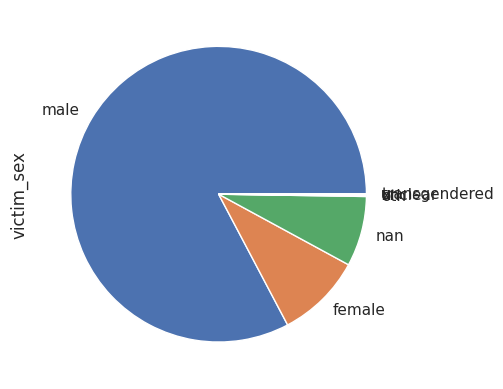

In [114]:
# pie chart for victim_sex
data['victim_sex'].str.lower().value_counts(dropna=False).plot.pie()

In [115]:
#delete  columns not relevant to research
data = data.drop(data.columns[[0,1,3,4,8,9,10,12,22]], axis=1)
# missing values
print(data.isnull().sum())

agency_name                     0
occurred_date                   6
occurred_time                5183
offense_category                0
weapon                       2393
offense_group                   0
domestic_violence_ind       16821
family_violence_ind         18616
gang_activity_ind            8554
relationship_to_offender    18616
circumstance                17879
inside_outside              16827
victim_age                   1598
victim_race                  1433
victim_race_condensed           0
victim_sex                   1428
case_status                  1635
arrest_ind                   5938
clearance_status              454
clearance_group                 0
clearance_date              18274
arrest_date                 18616
Fatality Status                 0
dtype: int64


In [116]:
#delete  columns with missing values > .75
data.drop([ 'domestic_violence_ind','family_violence_ind','relationship_to_offender','circumstance',
'inside_outside'], axis=1, inplace=True)
print(data.isnull().sum())

agency_name                  0
occurred_date                6
occurred_time             5183
offense_category             0
weapon                    2393
offense_group                0
gang_activity_ind         8554
victim_age                1598
victim_race               1433
victim_race_condensed        0
victim_sex                1428
case_status               1635
arrest_ind                5938
clearance_status           454
clearance_group              0
clearance_date           18274
arrest_date              18616
Fatality Status              0
dtype: int64


In [117]:
# quasi constant values
for val in data.columns.sort_values():
    if (len(data[val].unique()) < 3):
        print(data[val].value_counts())

Non-Fatal    13544
Fatal         5072
Name: Fatality Status, dtype: int64
Series([], Name: arrest_date, dtype: int64)


**Drop Newark-PD**
because it contained over 90% of missing values from clearance_status,weapon,victim_age, victim_sex, victim_race, case_status.

In [118]:
#drop Newark-PD
data.drop(index=data[data['agency_name'] =='NEWARK-PD'].index, inplace=True)
print(data.isnull().sum())

agency_name                  0
occurred_date                0
occurred_time             5171
offense_category             0
weapon                      24
offense_group                0
gang_activity_ind         7091
victim_age                 155
victim_race                  6
victim_race_condensed        0
victim_sex                   5
case_status                680
arrest_ind                5938
clearance_status             0
clearance_group              0
clearance_date           15905
arrest_date              16247
Fatality Status              0
dtype: int64


In [119]:
# impute missing values mode and  mean
data['victim_age'].fillna(round(data['victim_age'].mean(), 2), inplace=True)
data['victim_sex'].fillna(data['victim_sex'].mode()[0], inplace=True)
data['weapon'].fillna(data['weapon'].mode()[0], inplace=True)
data['victim_race'].fillna(data['victim_race'].mode()[0], inplace=True)
print(data.isnull().sum())

agency_name                  0
occurred_date                0
occurred_time             5171
offense_category             0
weapon                       0
offense_group                0
gang_activity_ind         7091
victim_age                   0
victim_race                  0
victim_race_condensed        0
victim_sex                   0
case_status                680
arrest_ind                5938
clearance_status             0
clearance_group              0
clearance_date           15905
arrest_date              16247
Fatality Status              0
dtype: int64


# One-Hot Encoding

In [120]:
#one hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['offense_group', 'Fatality Status','agency_name','victim_race','victim_sex']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
print(transformed_df.head())

  onehotencoder__offense_group_Agg Assault - Gun  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

  onehotencoder__offense_group_Homicide - Gun  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

  onehotencoder__offense_group_Non-Fatal Shooting  \
0                                             1.0   
1                                             1.0   
2                                             1.0   
3                                             1.0   
4                                             1.0   

  onehotencoder__Fatality Status_Fatal  \
0                              

<Axes: xlabel='Fatality Status'>

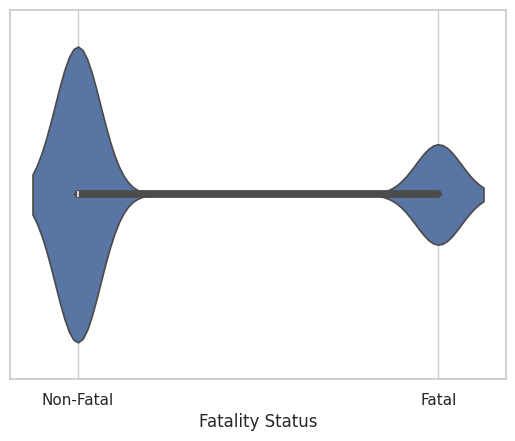

In [121]:
#violin plot
import seaborn

seaborn.set(style = 'whitegrid')

seaborn.violinplot(x ='Fatality Status', data = data)

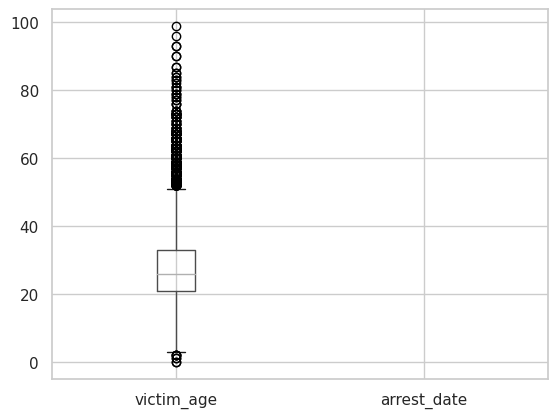

In [122]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
# Creating plot
data.boxplot()

# show plot
plt.show()

<Axes: ylabel='Fatality Status'>

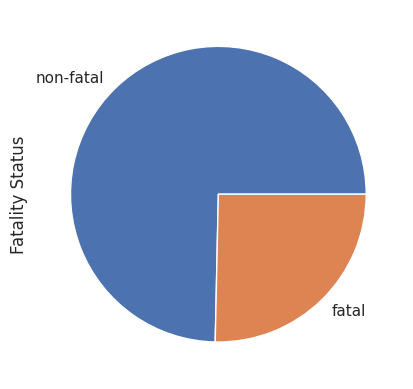

In [123]:
# pie chart
data['Fatality Status'].str.lower().value_counts(dropna=False).plot.pie()

# Train Test Split

In [124]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Fatality Status'], axis=1), data['Fatality Status'], test_size=.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(12997, 17)
(3250, 17)
